In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Social_Network_Ads.csv')

In [6]:
df = df[['Age','EstimatedSalary','Purchased']]

In [7]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

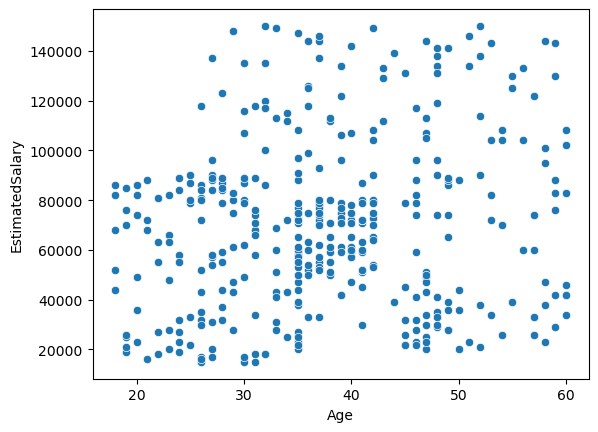

In [9]:
sns.scatterplot(x = df.iloc[:,0], y = df.iloc[:, 1])

In [11]:
X = df.iloc[: , : -1]
y = df.iloc[:, -1]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [14]:
X_train

,Age,EstimatedSalary
205,47,47000
354,36,99000
3,27,57000
264,48,90000
194,28,89000
...,...,...
299,46,117000
22,48,41000
72,20,23000
15,29,80000


In [16]:
model = Sequential()

model.add(Dense(128, activation='relu',input_dim = 2))
model.add(Dense(1, activation='sigmoid'))

d:\admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
history = model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - accuracy: 0.6322 - loss: 5153.8647 - val_accuracy: 0.6000 - val_loss: 2097.7515
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6144 - loss: 863.2440 - val_accuracy: 0.4000 - val_loss: 812.5557
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4204 - loss: 565.8394 - val_accuracy: 0.6000 - val_loss: 578.2178
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5905 - loss: 344.3031 - val_accuracy: 0.4000 - val_loss: 117.6181
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.4919 - loss: 115.4233 - val_accuracy: 0.4000 - val_loss: 111.9675
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5690 - loss: 125.6701 - val_accuracy: 0.4000 - val_loss: 188.0118
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4569 - loss: 154.2995 - val_accuracy: 0.4000 - val_loss: 116.4834
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4131 - 

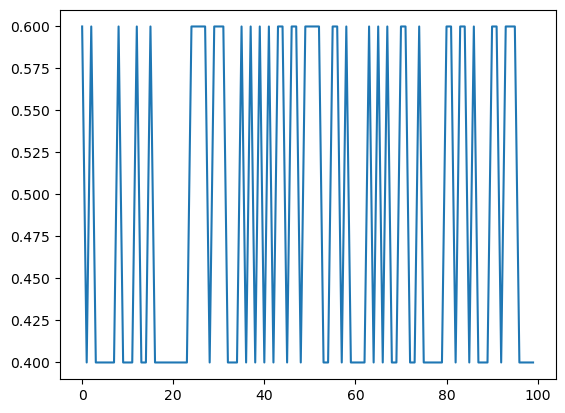

In [ ]:
plt.plot(history.history['val_accuracy'])        ### ocilating the value due to without data scaling

In [21]:
#### Now applying the feature scaling

In [23]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

In [24]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<Axes: >

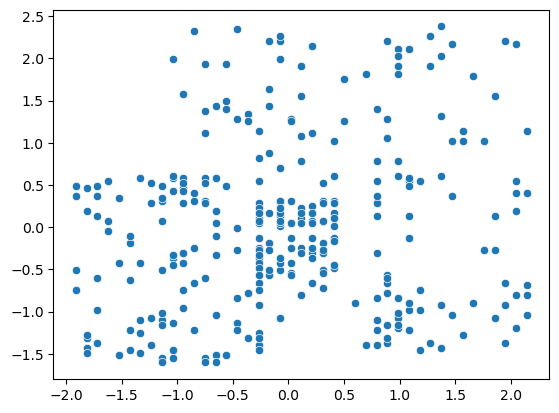

In [27]:
sns.scatterplot(x=X_train_scaled[:,0],y=X_train_scaled[:,1])

In [28]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100)

Epoch 1/100


d:\admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - accuracy: 0.7932 - loss: 0.6483 - val_accuracy: 0.7875 - val_loss: 0.5976
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8425 - loss: 0.5905 - val_accuracy: 0.8125 - val_loss: 0.5507
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8595 - loss: 0.5518 - val_accuracy: 0.8125 - val_loss: 0.5111
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.8701 - loss: 0.5086 - val_accuracy: 0.8000 - val_loss: 0.4761
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8527 - loss: 0.4910 - val_accuracy: 0.7875 - val_loss: 0.4466
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8330 - loss: 0.4767 - val_accuracy: 0.7875 - val_loss: 0.4212
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8763 - loss: 0.4320 - val_accuracy: 0.8250 - val_loss: 0.3982
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8682 - loss: 0.4058 - val_accuracy: 0.8250 - val_l

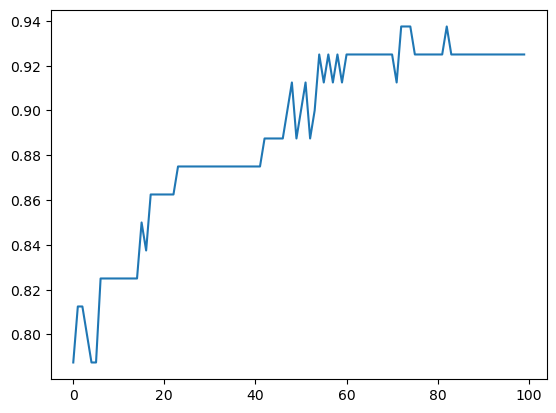

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

In [ ]:
#### when range is not known then use standardize  (like salary range)  also if data if normaly distributed then also use standardize
#### when range is known then normalize (like cgpa it's 0 to 10)